# Modeling for predicting the condo size
## Neural Network
In the first part of the modeling, we want to use neural network of fully connected layers. We will try different layers, regularization methods, optimization methods, training rounds.

I made a change to the data, put studio as a seperate category.
changed 31-50 in age of bnuilding to 45. Changed 0-5 to 2.5, changed 6-10 to 8, changed 11-15 to 13, 16-30 to 23, 31-50 to 45.

In [1]:
import pandas as pd
import numpy as np

#load the data
df = pd.read_csv('out2.csv',header=0,index_col=0)
tar = pd.read_csv('output.csv',header=0,index_col=0)

#use 1000 dollor as an unit
tar/=1000

In [2]:
#replace the missing value withe -1
df.fillna(0,inplace=True)
df.isnull().any()
df.dtypes
tar.dtypes

Pricepersqm    float64
dtype: object

In [3]:
# set the train set and test set
train=df[:2500]
test=df[2500:]
train_tar=tar[:2500]
test_tar=tar[2500:]

#normalize the training data
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

#set the validation set
train_par=train[:2100]
train_par_tar=train_tar[:2100]
val=train[2100:]
val_tar=train_tar[2100:]

In [4]:
from keras import models
from keras import layers

n=train_par.shape[1]
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(n,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

train_par.astype('float64')
train_par_tar.astype('float64')
val.astype('float64')
val_tar.astype('float64')
history=model.fit(train_par,train_par_tar,epochs=50,batch_size=20,validation_data=(val,val_tar),verbose=0)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


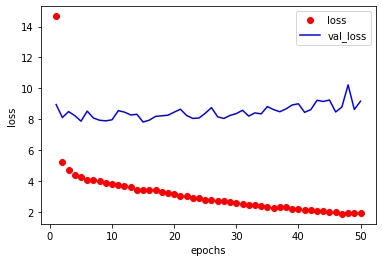

In [5]:
#Draw the mse and mae
import matplotlib.pyplot as plt

print(history.history.keys())

dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


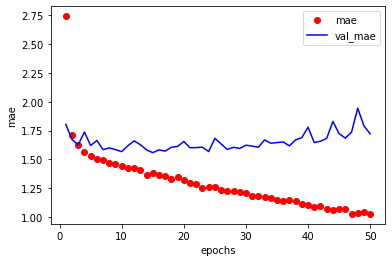

In [6]:
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [8]:
# we can try another model with fewer nodes and layers
n=train_par.shape[1]
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(n,)))
model.add(layers.Dense(64,activation='relu'))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


# at this time we can 
history=model.fit(train_par,train_par_tar,epochs=200,batch_size=1,validation_data=(val,val_tar),verbose=0)

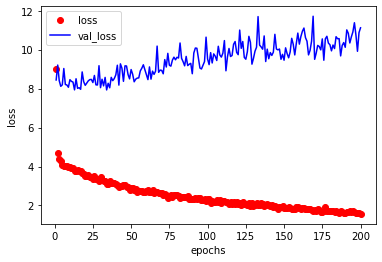

In [9]:
dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

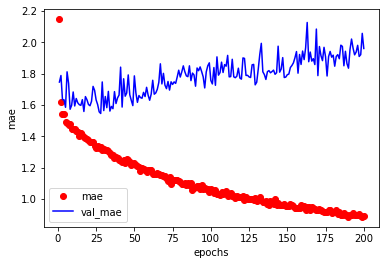

In [10]:
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [11]:
min(val_mae)

1.5449751615524292

It can be seen that the mae value of the validation data set has been rising, indicating that the model is overfitted very quickly. So we add dropout layers into the model.

In [12]:
# we can try another model with fewer nodes and layers
n=train_par.shape[1]
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


# at this time we can 
history=model.fit(train_par,train_par_tar,epochs=150,batch_size=1,validation_data=(val,val_tar),verbose=0)

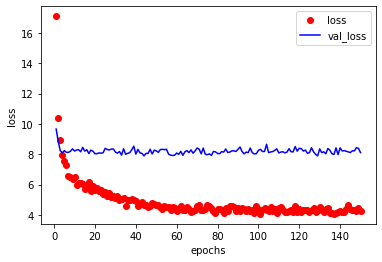

In [13]:
dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

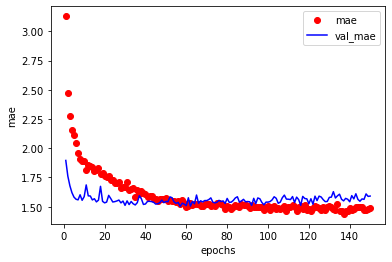

1.5020816326141357

In [14]:
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()
min(val_mae)

In [15]:
print('the index of smallest mae',val_mae.index(min(val_mae)))
print('the index of smallest mse',val_loss.index(min(val_loss)))

the index of smallest mae 56
the index of smallest mse 128


The overfitting was significantly reduced by dropout, the lowest mae occured on the 31 epoch(For different trials this may be different, because the randomness ofoptimization). So, we use all the data from the training set to train the model again.

In [16]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model.fit(train,train_tar,epochs=31,batch_size=1,verbose=0)

result=model.evaluate(test,test_tar)

13/13 [==============================] - 0s 747us/step - loss: 3.8797 - mae: 1.5046


In [17]:
result

[3.8797383308410645, 1.5046066045761108]

In [18]:
print(np.mean(tar))
1.46543/10.305306

Pricepersqm    10.305306
dtype: float64


0.14220150279865537

From the result, the difference between our predicted price and the actual price is about 1,500 dollars. It is 14.22% of the average house price.

Then we try a smaller network with less neurons.

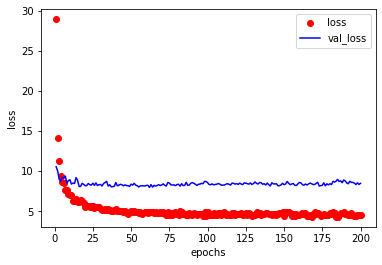

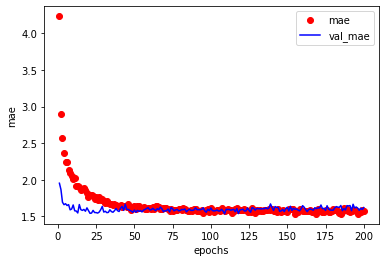

In [22]:
# 32 neurons each layers
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history=model.fit(train_par,train_par_tar,epochs=200,batch_size=1,validation_data=(val,val_tar),verbose=0)

dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

# draw the mse, also seen as the loss function
plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# draw the mae, also seen as the loss function
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [20]:
min(val_mae)

1.4596003293991089

Epoch 1/200
2100/2100 [==============================] - 2s 810us/step - loss: 35.0595 - mae: 4.6930 - val_loss: 12.6840 - val_mae: 2.2160
Epoch 2/200
2100/2100 [==============================] - 2s 826us/step - loss: 18.1821 - mae: 3.3161 - val_loss: 11.2780 - val_mae: 2.0116
Epoch 3/200
2100/2100 [==============================] - 2s 1ms/step - loss: 14.5339 - mae: 2.9640 - val_loss: 10.6872 - val_mae: 1.9140
Epoch 4/200
2100/2100 [==============================] - 2s 916us/step - loss: 12.5731 - mae: 2.6954 - val_loss: 10.1937 - val_mae: 1.8034
Epoch 5/200
2100/2100 [==============================] - 2s 865us/step - loss: 11.4500 - mae: 2.5797 - val_loss: 9.8967 - val_mae: 1.7679
Epoch 6/200
2100/2100 [==============================] - 2s 775us/step - loss: 10.4185 - mae: 2.4850 - val_loss: 10.6405 - val_mae: 1.8854
Epoch 7/200
2100/2100 [==============================] - 2s 755us/step - loss: 9.0840 - mae: 2.3305 - val_loss: 9.5829 - val_mae: 1.7280
Epoch 8/200
2100/2100 [=========

2100/2100 [==============================] - 2s 716us/step - loss: 5.3166 - mae: 1.6798 - val_loss: 8.7458 - val_mae: 1.6395
Epoch 61/200
2100/2100 [==============================] - 1s 688us/step - loss: 5.4927 - mae: 1.7136 - val_loss: 9.0542 - val_mae: 1.6517
Epoch 62/200
2100/2100 [==============================] - 2s 745us/step - loss: 5.4930 - mae: 1.7262 - val_loss: 8.8320 - val_mae: 1.6630
Epoch 63/200
2100/2100 [==============================] - 2s 1ms/step - loss: 5.3417 - mae: 1.6985 - val_loss: 8.8337 - val_mae: 1.6433
Epoch 64/200
2100/2100 [==============================] - 2s 1ms/step - loss: 5.3716 - mae: 1.7090 - val_loss: 9.0719 - val_mae: 1.6641
Epoch 65/200
2100/2100 [==============================] - 2s 815us/step - loss: 5.4221 - mae: 1.7036 - val_loss: 9.3134 - val_mae: 1.6748
Epoch 66/200
2100/2100 [==============================] - 2s 823us/step - loss: 5.7219 - mae: 1.7145 - val_loss: 9.0700 - val_mae: 1.6808
Epoch 67/200
2100/2100 [===========================

2100/2100 [==============================] - 2s 782us/step - loss: 5.4349 - mae: 1.6882 - val_loss: 8.9190 - val_mae: 1.6739
Epoch 120/200
2100/2100 [==============================] - 2s 839us/step - loss: 5.5121 - mae: 1.7322 - val_loss: 8.7770 - val_mae: 1.6691
Epoch 121/200
2100/2100 [==============================] - 2s 835us/step - loss: 5.3597 - mae: 1.6642 - val_loss: 8.8970 - val_mae: 1.6850
Epoch 122/200
2100/2100 [==============================] - 2s 935us/step - loss: 5.0251 - mae: 1.6730 - val_loss: 9.7102 - val_mae: 1.7405
Epoch 123/200
2100/2100 [==============================] - 2s 846us/step - loss: 5.1524 - mae: 1.6672 - val_loss: 9.1907 - val_mae: 1.6864
Epoch 124/200
2100/2100 [==============================] - 2s 860us/step - loss: 5.1903 - mae: 1.6821 - val_loss: 9.2734 - val_mae: 1.7055
Epoch 125/200
2100/2100 [==============================] - 2s 1ms/step - loss: 4.8434 - mae: 1.6501 - val_loss: 8.8121 - val_mae: 1.6557
Epoch 126/200
2100/2100 [==================

Epoch 178/200
2100/2100 [==============================] - 2s 814us/step - loss: 5.3321 - mae: 1.6991 - val_loss: 9.2349 - val_mae: 1.7655
Epoch 179/200
2100/2100 [==============================] - 2s 875us/step - loss: 5.3948 - mae: 1.7030 - val_loss: 8.8304 - val_mae: 1.7506
Epoch 180/200
2100/2100 [==============================] - 2s 880us/step - loss: 5.3912 - mae: 1.6828 - val_loss: 8.5233 - val_mae: 1.6721
Epoch 181/200
2100/2100 [==============================] - 2s 915us/step - loss: 5.3561 - mae: 1.7128 - val_loss: 8.7924 - val_mae: 1.7152
Epoch 182/200
2100/2100 [==============================] - 2s 870us/step - loss: 5.1693 - mae: 1.6910 - val_loss: 8.8421 - val_mae: 1.7184
Epoch 183/200
2100/2100 [==============================] - 2s 864us/step - loss: 5.2784 - mae: 1.7037 - val_loss: 8.6497 - val_mae: 1.6429
Epoch 184/200
2100/2100 [==============================] - 2s 847us/step - loss: 5.5906 - mae: 1.6856 - val_loss: 8.8346 - val_mae: 1.7154
Epoch 185/200
2100/2100 [==

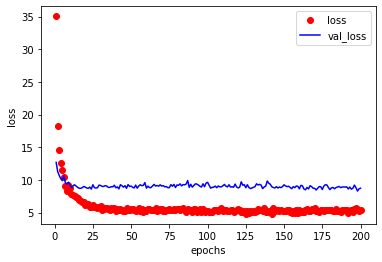

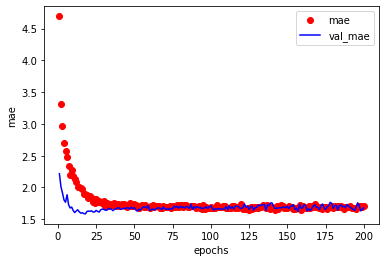

the smallest validation mae 1.5839829444885254


In [23]:
# 16 neurons each layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history=model.fit(train_par,train_par_tar,epochs=200,batch_size=1,validation_data=(val,val_tar))

dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

# draw the mse, also seen as the loss function
plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# draw the mae, also seen as the loss function
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()
print('the smallest validation mae',min(val_mae))

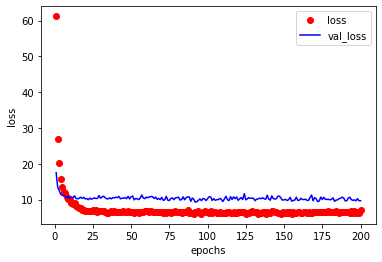

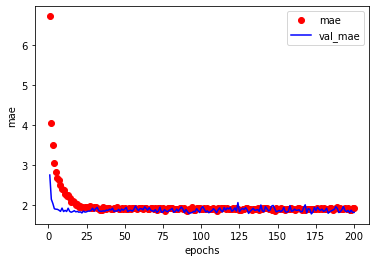

the smallest validation mae 1.786924123764038


In [24]:
# 8 neurons each layers
model=models.Sequential()
model.add(layers.Dense(8,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history=model.fit(train_par,train_par_tar,epochs=200,batch_size=1,validation_data=(val,val_tar),verbose=0)

dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

# draw the mse, also seen as the loss function
plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# draw the mae, also seen as the loss function
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()
print('the smallest validation mae',min(val_mae))